In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/precog-task/judges_clean/judges_clean.csv
/kaggle/input/precog-task/acts_sections/acts_sections.csv
/kaggle/input/precog-task/cases/cases/cases_2015.csv
/kaggle/input/precog-task/cases/cases/cases_2012.csv
/kaggle/input/precog-task/cases/cases/cases_2018.csv
/kaggle/input/precog-task/cases/cases/cases_2013.csv
/kaggle/input/precog-task/cases/cases/cases_2017.csv
/kaggle/input/precog-task/cases/cases/cases_2010.csv
/kaggle/input/precog-task/cases/cases/cases_2014.csv
/kaggle/input/precog-task/cases/cases/cases_2016.csv
/kaggle/input/precog-task/cases/cases/cases_2011.csv
/kaggle/input/precog-task/keys/keys/type_name_key.csv
/kaggle/input/precog-task/keys/keys/cases_district_key.csv
/kaggle/input/precog-task/keys/keys/act_key.csv
/kaggle/input/precog-task/keys/keys/disp_name_key.csv
/kaggle/input/precog-task/keys/keys/purpose_name_key.csv
/kaggle/input/precog-task/keys/keys/cases_state_key.csv
/kaggle/input/precog-task/keys/keys/section_key.csv
/kaggle/input/precog-task/key

In [3]:
judges = pd.read_csv('/kaggle/input/precog-task/judges_clean/judges_clean.csv')
judges

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,1 female,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,15-05-2017,28-01-2019


In [114]:
judges.start_date = pd.to_datetime(judges.start_date, dayfirst = True)

In [6]:
states = pd.read_csv('/kaggle/input/precog-task/keys/keys/cases_state_key.csv')
states = states[["state_code", "state_name"]]
states.drop_duplicates(inplace=True)
code_to_state = states.set_index('state_code').T.to_dict()
for k, val in code_to_state.items():
    code_to_state[k] = val['state_name']
    
code_to_state

{2: 'Andhra Pradesh',
 29: 'Telangana',
 6: 'Assam',
 8: 'Bihar',
 27: 'Chandigarh',
 18: 'Chhattisgarh',
 32: 'DNH at Silvasa',
 31: 'Diu and Daman',
 30: 'Goa',
 17: 'Gujarat',
 14: 'Haryana',
 5: 'Himachal Pradesh',
 33: 'Ladakh',
 12: 'Jammu and Kashmir',
 7: 'Jharkhand',
 3: 'Karnataka',
 4: 'Kerala',
 23: 'Madhya Pradesh',
 1: 'Maharashtra',
 25: 'Manipur',
 21: 'Meghalaya',
 19: 'Mizoram',
 26: 'Delhi',
 11: 'Orissa',
 22: 'Punjab',
 9: 'Rajasthan',
 24: 'Sikkim',
 10: 'Tamil Nadu',
 20: 'Tripura',
 13: 'Uttar Pradesh',
 15: 'Uttarakhand',
 16: 'West Bengal'}

In [7]:
gendered_judge = judges[judges.female_judge != '-9998 unclear']
gendered_judge

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,2013-09-20,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,2013-10-31,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,2014-02-21,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,2016-06-01,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,2016-06-06,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,1 female,2004-04-21,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,2015-01-16,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,2016-12-09,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,2017-05-15,28-01-2019


In [8]:
no_of_districts = judges[["state_code", "dist_code"]].drop_duplicates().shape[0]
print(f"There are {no_of_districts} districts")

There are 610 districts


In [14]:
judges.state_code.value_counts()

1     22440
13    14038
17     7361
3      6815
23     5629
9      5433
8      4124
10     3716
2      3508
4      3107
16     2702
29     2589
14     2338
7      2285
11     2038
22     1941
6      1578
26     1496
15     1082
18     1040
5       915
12      910
20      444
30      337
24      167
21      148
27      140
25      113
19       44
Name: state_code, dtype: int64

In [49]:
# filelist = os.listdir('kaggle/input/precog-task/cases/cases')
# filelist = ['/kaggle/input/precog-task/cases/cases/cases_2010.csv']
# #read them into pandas
# df_list = [pd.read_csv(file) for file in filelist]
# #concatenate them together
# big_df = pd.concat(df_list)

In [115]:
# big_df.tail()

In [ ]:
gendered_judge["state_name"] = gendered_judge["state_code"].apply(lambda x: code_to_state[x])
women_judges_per_state = gendered_judge.loc[gendered_judge["female_judge"]=="1 female"].groupby(["state_name"])["ddl_judge_id"].count()
total_judges_per_state = gendered_judge.groupby(["state_name"])["ddl_judge_id"].count()
ratio = (gendered_judge.loc[gendered_judge["female_judge"]=="1 female"].groupby(["state_name"])["ddl_judge_id"].count()/gendered_judge.groupby(["state_name"])["ddl_judge_id"].count())

In [101]:
ratio_df = pd.DataFrame(ratio)
ratio_df.columns=["ratio of female to total judges"]
ratio_df.sort_values(by="ratio of female to total judges",inplace=True)

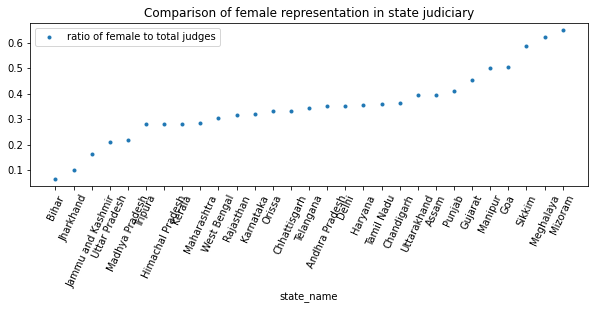

In [113]:
ax = ratio_df.plot(style=".", title="Comparison of female representation in state judiciary",figsize=(10,3), x_compat = True)
ax.set_xticks(range(len(ratio_df)));
ax.set_xticklabels([item for item in ratio_df.index.tolist()], rotation=65);

In [103]:
ratio_df

,ratio of female to total judges
state_name,
Bihar,0.066731
Jharkhand,0.099869
Jammu and Kashmir,0.164627
Uttar Pradesh,0.210372
Madhya Pradesh,0.219237
Tripura,0.280822
Himachal Pradesh,0.280936
Kerala,0.282353
Maharashtra,0.283395
